SISTEM KENDALI 

program python ini di manfaatkan untuk menggantikan matlab dari mata kuliah sistem kendali. pemanfaatan python digunakan sebagai alternatif atau memindahkan program matlab dari mata kuliah lalu dan digunakan untuk pyhton

In [2]:
import control as ctl
import numpy as np
import matplotlib.pyplot as plt

<TransferFunction>: sys[9]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

          1
  ------------------
  3 s^2 + 20 s + 800


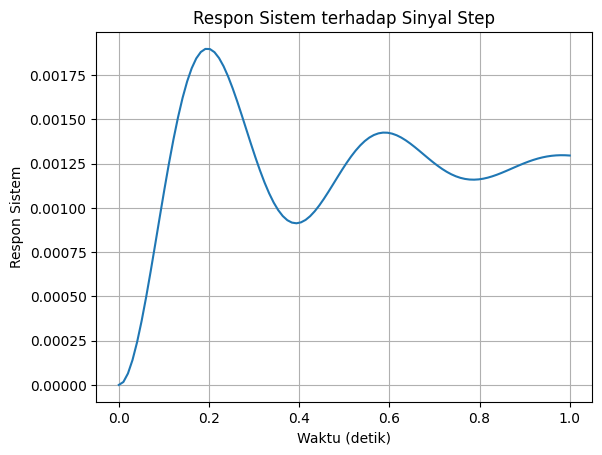

In [7]:
m = 3
F = 1
k = 800
b = 20
num = np.array([1])
den = np.array([m, b, k])
tf_mpg = ctl.tf(num, den)
print(tf_mpg)
#menampilkan respon sistem
time = np.linspace(0, 5, 100)
# Respon terhadap sinyal step
t, y = ctl.step_response(tf_mpg, F)
plt.plot(t, y)
plt.xlabel('Waktu (detik)')
plt.ylabel('Respon Sistem') 
plt.title('Respon Sistem terhadap Sinyal Step')
plt.grid()
plt.show()

<TransferFunction>: sys[6]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         1
  ----------------
  2 s^2 + 17 s + 1


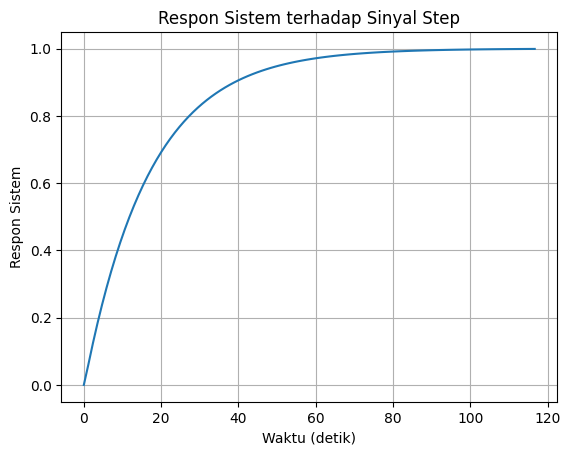

In [ ]:
R = 17
L = 2
C = 1

num = np.array([1])
den = np.array([L*C, R*C, C])
tf_rlc = ctl.tf(num, den)
print(tf_rlc)
#menampilkan respon sistem
#time = np.linspace(0, 20, 100)
# Respon terhadap sinyal step
t, y = ctl.step_response(tf_rlc)
plt.plot(t, y)
plt.xlabel('Waktu (detik)')
plt.ylabel('Respon Sistem')
plt.title('Respon Sistem terhadap Sinyal Step')
plt.grid()
plt.show()

PENGGUNAAN PZMAP DAN C2D KONTINYU TO DISKRIT

<TransferFunction>: sys[8]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

       1
  -----------
  s^2 + s + 1
ZOH discretized system:
 <TransferFunction>: sys[8]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = 0.1

  0.004833 z + 0.004675
  ----------------------
  z^2 - 1.895 z + 0.9048
Tustin (bilinear) discretized system:
 <TransferFunction>: sys[8]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = 0.1

  0.002375 z^2 + 0.004751 z + 0.002375
  ------------------------------------
         z^2 - 1.895 z + 0.905
FOH discretized system:
 <TransferFunction>: sys[8]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = 0.1

  0.001625 z^2 + 0.006338 z + 0.001546
  ------------------------------------
         z^2 - 1.895 z + 0.9048


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\control\pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\control\pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\control\pzmap.py:381: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\control\pzmap.py:327: FutureWarning:

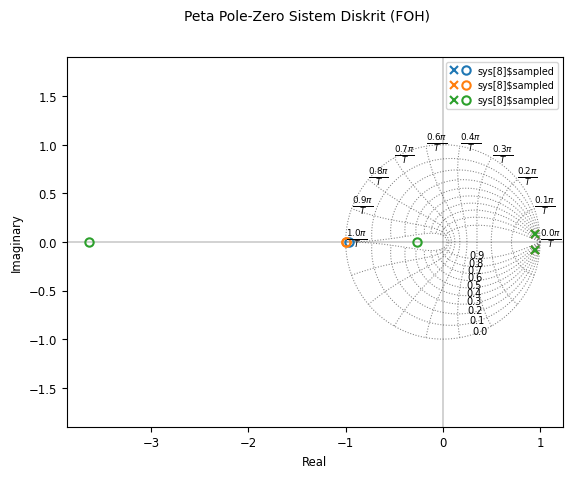

In [7]:
num = np.array([1])
den = np.array([1, 1, 1])
tf_2 = ctl.tf(num, den)
print(tf_2)

# menampilkan respon sistem — discretize with ZOH and Tustin (bilinear) and compare
sysd_zoh = ctl.c2d(tf_2, 0.1, method='zoh')
print("ZOH discretized system:\n", sysd_zoh)
sysd_tustin = ctl.c2d(tf_2, 0.1, method='tustin')
print("Tustin (bilinear) discretized system:\n", sysd_tustin)
sysd_foh = ctl.c2d(tf_2, 0.1, method='foh')
print("FOH discretized system:\n", sysd_foh)

# plot pole-zero maps for both discrete systems (pzmap does not accept 'method' keyword)
pzmap_zoh = ctl.pzmap(sysd_zoh, plot=True, title='Peta Pole-Zero Sistem Diskrit (ZOH)', grid=True)
pzmap_tustin = ctl.pzmap(sysd_tustin, plot=True, title='Peta Pole-Zero Sistem Diskrit (Tustin)', grid=True)
pzmap_foh = ctl.pzmap(sysd_foh, plot=True, title='Peta Pole-Zero Sistem Diskrit (FOH)', grid=True)
plt.show()

DESIN KONTROL

<TransferFunction>: sys[48]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         1
  ---------------
  s^2 + 10 s + 20


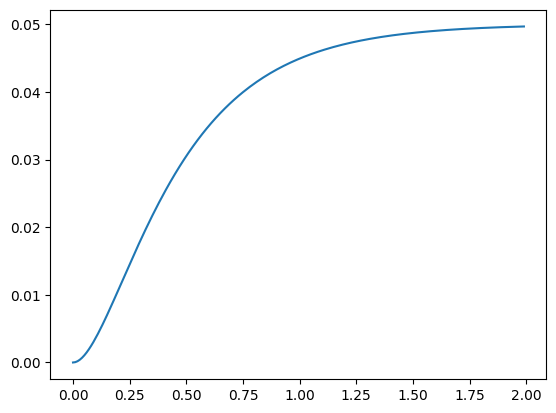

In [16]:
m = 1
b = 10
k = 20
num = np.array([1])
den = np.array([m, b, k])
plant = ctl.tf(num, den)
print(plant) 
#menampilkan respon sistem
time = np.arange(0, 2, 0.01)
ta, ya = ctl.step_response(plant, time)
plt.plot(ta, ya)


KONTROL Kp

<TransferFunction>: sys[84]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        300
  ----------------
  s^2 + 10 s + 320


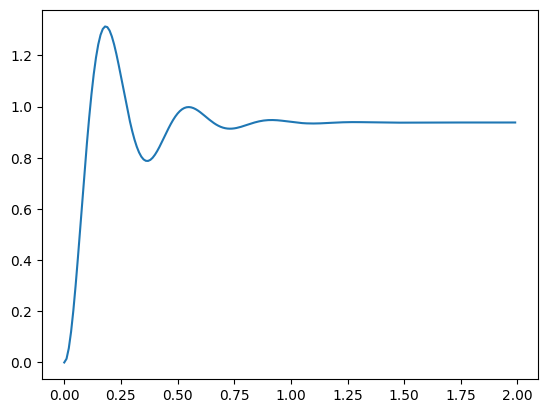

In [23]:
#PENGUATAN KONTROLER PROPORTIONAL
Kp = 300
sys_ctl = ctl.feedback(Kp*plant, 1)
print(sys_ctl)
tb, yb = ctl.step_response(sys_ctl, time)
plt.plot(tb, yb)

KONTROL KD

<TransferFunction>: sys[89]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     10 s + 300
  ----------------
  s^2 + 20 s + 320


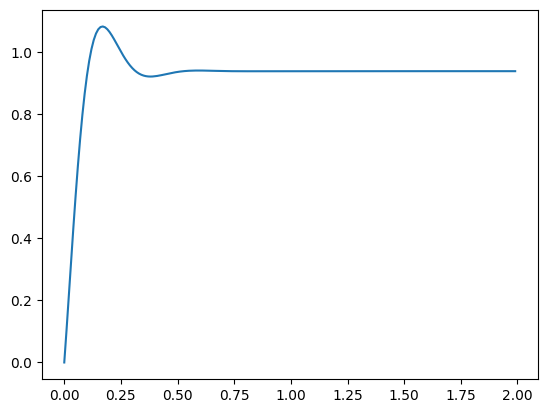

In [24]:
kp = 300
kd = 10

contr = ctl.tf([kd, kp], [1])
sys_ctl2 = ctl.feedback(contr*plant, 1)
print(sys_ctl2)
tc, yc = ctl.step_response(sys_ctl2, time)
plt.plot(tc, yc)

KONTROL PI

<TransferFunction>: sys[94]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         30 s + 70
  ------------------------
  s^3 + 10 s^2 + 50 s + 70


Text(0, 0.5, 'Respon Sistem')

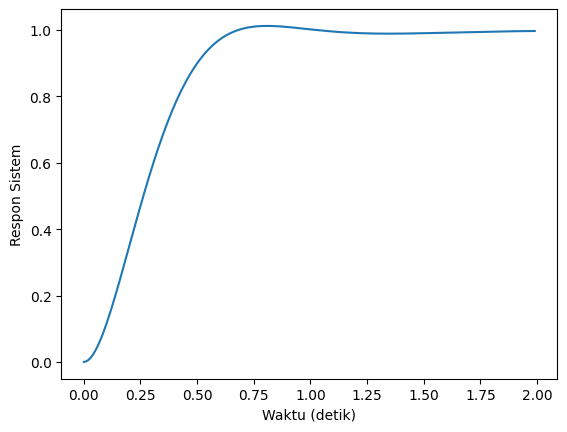

In [25]:
kp = 30
ki = 70

contr2 = ctl.tf([kp, ki], [1, 0])
sys_ctl3 = ctl.feedback(contr2*plant, 1)
print(sys_ctl3)
T = np.arange(0, 2, 0.01)
t1, y1 = ctl.step_response(sys_ctl3, T)
plt.plot(t1, y1)
plt.xlabel('Waktu (detik)')
plt.ylabel('Respon Sistem')

KONTROL PID

<TransferFunction>: sys[76]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  50 s^2 + 350 s + 300
  --------------------
           s


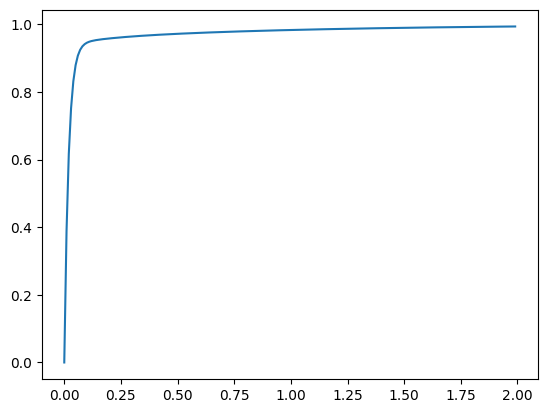

In [22]:
kp = 350
ki = 300
kd = 50

contr3 = ctl.tf([kd, kp, ki], [1, 0])
print(contr3)
sys_ctl4 = ctl.feedback(contr3*plant, 1)
t2, y2 = ctl.step_response(sys_ctl4, T)
plt.plot(t2, y2)